In [1]:
import numpy as np
import torch
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
n_dots = 500
x1 = torch.linspace(-2, 2, n_dots).view(-1, 1)
x2 = torch.linspace(-2, 2, n_dots).view(-1, 1)
y_data = (1 + torch.sin(2* x1 + 3 * x2))/(3.5 + torch.sin(x1 -x2)) + 0.1 * torch.randn(x1.size())
x_data = torch.cat((x1, x2), -1)

train_set_input, test_set_input, train_set_output, test_set_output = train_test_split(x_data, y_data, test_size=0.2,shuffle=True)
# train_set_input, val_set_input, train_set_output, val_set_output = train_test_split(train_set_input, train_set_output, test_size=2./6,shuffle=True)

In [3]:
# 构建网络1
neure = 5
net = nn.Sequential(
    nn.Linear(2, neure),
    nn.ReLU(),
    nn.Linear(neure, 1),
    nn.Sigmoid(),
)

# 3 定义优化器和损失函数
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

# 4 训练网络
max_epoch = 500
mse_loss = []
for i in range(max_epoch):
    predict = net(torch.FloatTensor(train_set_input))
    l = loss(torch.FloatTensor(train_set_output), predict)
    optimizer.zero_grad()    
    l.backward()
    optimizer.step()
    mse_loss.append(l.item())

In [4]:
# 构建网络2
neure = 5
net = nn.Sequential(
    nn.Linear(2, neure),
    nn.ReLU(),
    nn.Linear(neure, 1),
    nn.Sigmoid(),
)

# 3 定义优化器和损失函数
loss = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

# 4 训练网络
max_epoch = 500
L1_loss = []
for i in range(max_epoch):
    predict = net(torch.FloatTensor(train_set_input))
    l = loss(torch.FloatTensor(train_set_output), predict)
    optimizer.zero_grad()    
    l.backward()
    optimizer.step()
    L1_loss.append(l.item())

In [5]:
# 构建网络3
neure = 5
net = nn.Sequential(
    nn.Linear(2, neure),
    nn.ReLU(),
    nn.Linear(neure, 1),
    nn.Sigmoid(),
)

# 3 定义优化器和损失函数
loss = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

# 4 训练网络
max_epoch = 500
smooth_loss = []
for i in range(max_epoch):
    predict = net(torch.FloatTensor(train_set_input))
    l = loss(torch.FloatTensor(train_set_output), predict)
    optimizer.zero_grad()    
    l.backward()
    optimizer.step()
    smooth_loss.append(l.item())

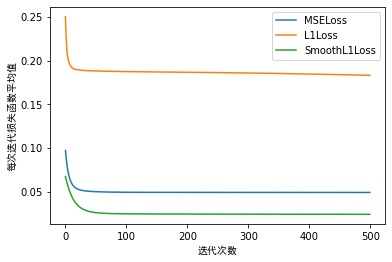

In [6]:
x = np.arange(max_epoch)
y1 = np.array(mse_loss)
y2 = np.array(L1_loss)
y3 = np.array(smooth_loss)

myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
plt.plot(x, y1, label='MSELoss')
plt.plot(x, y2, label='L1Loss')
plt.plot(x, y3, label='SmoothL1Loss')
plt.legend()

plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.savefig('../../期末作业/figures/损失函数随迭代次数变化图像.png', dpi=900)
plt.show()